In [7]:
%run ../../main.py
%matplotlib inline

In [8]:
import pandas as pd

from cba.algorithms import M1Algorithm, M2Algorithm, top_rules, createCARs 
from cba.data_structures import TransactionDB

In [9]:
#
#
# =========================
# Oveření běhu v závislosti na vložených pravidlech / instancích
# =========================
#
#
#

import time

target_rule_count = 50

benchmark_data = {
    "rule_count": [],
    "M1_duration": [],
    "M2_duration": []
}

number_of_iterations = 10

directory = "c:/code/python/machine_learning/assoc_rules"


for sequence in [*range(10, 20), *range(20, 100, 10), *range(200, 1000, 50), *range(2000, 10000, 500), *range(20000, 100000, 10000)]:
    target_rule_count = sequence

    dataset_name_benchmark = "lymph0"
    
    pd_ds = pd.read_csv("c:/code/python/machine_learning/assoc_rules/train/{}.csv".format(dataset_name_benchmark))
    txns = TransactionDB.from_pandasdf(pd_ds)
    
    rules = top_rules(txns.string_representation, appearance=txns.appeardict)

    cars = createCARs(rules)
     
    if len(cars) > target_rule_count:
        cars = cars[:target_rule_count]
        
    

    m1t1 = time.time()
    for _ in range(number_of_iterations):
        m1 = M1Algorithm(cars, txns)
        clf = m1.build()
    
    m1t2 = time.time()
    
    
    m2t1 = time.time()
    for _ in range(number_of_iterations):
        m2 = M2Algorithm(cars, txns)
        clf = m2.build()
    
    m2t2 = time.time()
    
     
    m1duration = (m1t2 - m1t1) / number_of_iterations
    m2duration = (m2t2 - m2t1) / number_of_iterations
    
    benchmark_data["rule_count"].append(target_rule_count)
    benchmark_data["M1_duration"].append(m1duration)
    benchmark_data["M2_duration"].append(m2duration)

    print("target rule count:", target_rule_count)
    print("M1 duration:", m1duration)
    print("M2 duration:", m2duration)
    print("\n\n")

Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 10
M1 duration: 0.004687643051147461
M2 duration: 0.020312809944152833



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 11
M1 duration: 0.0062502861022949215
M2 duration: 0.01562516689300537



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 12
M1 duration: 0.006250929832458496
M2 duration: 0.021874618530273438



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 13
M1 duration: 0.00781264305114746
M2 duration: 0.01562533378

M2 duration: 0.028125429153442384



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 950
M1 duration: 0.02656278610229492
M2 duration: 0.029687976837158202



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 2000
M1 duration: 0.03125009536743164
M2 duration: 0.04218814373016357



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 2500
M1 duration: 0.035938072204589847
M2 duration: 0.035937952995300296



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 1000
target rule count: 3000
M1 duration: 0.035

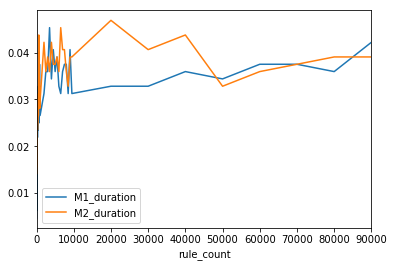

In [10]:
benchmark_data_pd = pd.DataFrame(benchmark_data)

benchmark_data_pd.plot(x=["rule_count"], y=["M1_duration", "M2_duration"])

In [14]:
#benchmark_data_pd.to_csv("../data/benchmark_rules_sensitivity.csv")
#benchmark_data_pd = read.csv("../data/benchmark_rules_sensitivity.csv")

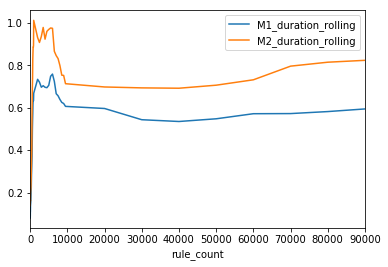

In [44]:
window = 10

benchmark_data_pd["M1_duration_rolling"] = benchmark_data_pd["M1_duration"].rolling(window=window, center=False).mean()

benchmark_data_pd["M2_duration_rolling"] = benchmark_data_pd["M2_duration"].rolling(window=window, center=False).mean()

benchmark_data_pd.plot(x=["rule_count"], y=["M1_duration_rolling", "M2_duration_rolling"])